In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('motorr.csv')
df.head()

,model_name,model_year,kms_driven,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,\n\n,30 bhp,197500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   mileage     7846 non-null   object
 4   power       7826 non-null   object
 5   price       7857 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 368.4+ KB


In [8]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
mileage       object
power         object
price          int64
dtype: object

In [9]:
# xóa khoảng trắng khỏi dữ liệu
for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()

In [10]:
# Xóa dấu phẩy khỏi cột kms_drive và cột giá
def clean_kms_driven(val):
    if not val:
        return ''

    val = val.lower()

    if 'kms' in val:
        val = val.replace('kms','')

    if 'km' in val:
        val = val.replace('km','')

    if 'mileage' in val.lower():
        return np.nan

    return val.replace(',','')


In [11]:
def clean_price(val):
    if not val:
        return ''

    val = str(val)

    val = val.replace(',','')


    return val
    

In [12]:
df['kms_driven'] = df['kms_driven'].apply(clean_kms_driven)

df['price'] = df['price'].apply(clean_price)

In [13]:
df['kms_driven'] = pd.to_numeric(df['kms_driven'],errors='coerce',downcast='integer')
df['price'] = pd.to_numeric(df['price'],errors='coerce',downcast='integer')

In [14]:
# mileage
def clean_mileage(val):
    if not val:
        return np.nan
    
    return str(val).lower().replace('kmpl','')

df['mileage'] = df.mileage.apply(clean_mileage)

In [15]:
# power
def clean_power(val):
    if not val:
        return np.nan
    
    return str(val).lower().replace('bhp','')

df['power'] = df.power.apply(clean_power)


In [16]:
# Sửa kiểu dữ liệu cột
cols = ['kms_driven', 'price','mileage','power']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int64  
 2   kms_driven  5869 non-null   float64
 3   mileage     6883 non-null   float64
 4   power       7429 non-null   float64
 5   price       7826 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 368.4+ KB


In [18]:
#Xử lý model_name
df['company'] = df['model_name'].apply(lambda x:' '.join(x.split()[0:1]))

In [19]:
df.head(8)

,model_name,model_year,kms_driven,mileage,power,price,company
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,35.0,19.00,63500.0,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.0,35.0,19.80,115000.0,Royal
2,Hyosung GT250R 2012,2012,14795.0,30.0,28.00,300000.0,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,NaN,NaN,34.50,100000.0,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.0,NaN,30.00,197500.0,Jawa
5,KTM Duke 200cc 2012,2012,24561.0,35.0,25.00,63400.0,KTM
6,Bajaj Pulsar 180cc 2016,2016,19718.0,65.0,17.00,55000.0,Bajaj
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,NaN,40.0,20.21,120000.0,TVS


In [20]:
#trích xuất chi tiết động cơ dưới dạng cc từ model_name
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [21]:
df['engine'] = pd.to_numeric(df['engine'], errors='coerce', downcast='integer')

In [22]:
#Dropping giá trị null 
df.dropna(inplace=True)


In [23]:
df.duplicated().sum()

18

In [24]:
#kiểm tra giá trị null
df.isna().sum()

model_name    0
model_year    0
kms_driven    0
mileage       0
power         0
price         0
company       0
engine        0
dtype: int64

In [25]:
df.shape

(3736, 8)

In [26]:
df.head()

,model_name,model_year,kms_driven,mileage,power,price,company,engine
1,Royal Enfield Classic 350cc 2016,2016,50000.0,35.0,19.8,115000.0,Royal,350.0
5,KTM Duke 200cc 2012,2012,24561.0,35.0,25.0,63400.0,KTM,200.0
6,Bajaj Pulsar 180cc 2016,2016,19718.0,65.0,17.0,55000.0,Bajaj,180.0
8,KTM Duke 390cc 2018,2018,1350.0,25.0,42.9,198000.0,KTM,390.0
10,Royal Enfield Classic 350cc 2018,2018,25000.0,35.0,19.8,136900.0,Royal,350.0


In [27]:
df['model_name']=df['model_name'].str.split().str.slice(start=0,stop=2).str.join(' ')

In [28]:
df=df.reset_index(drop=True)

In [29]:
#clean data
df

,model_name,model_year,kms_driven,mileage,power,price,company,engine
0,Royal Enfield,2016,50000.0,35.0,19.8,115000.0,Royal,350.0
1,KTM Duke,2012,24561.0,35.0,25.0,63400.0,KTM,200.0
2,Bajaj Pulsar,2016,19718.0,65.0,17.0,55000.0,Bajaj,180.0
3,KTM Duke,2018,1350.0,25.0,42.9,198000.0,KTM,390.0
4,Royal Enfield,2018,25000.0,35.0,19.8,136900.0,Royal,350.0
...,...,...,...,...,...,...,...,...
3731,Hero Karizma,2011,66780.0,48.0,20.0,39899.0,Hero,223.0
3732,Yamaha YZF-R15,2011,7000.0,42.0,16.0,55000.0,Yamaha,150.0
3733,Bajaj Pulsar,2016,6407.0,65.0,17.0,61740.0,Bajaj,180.0
3734,Bajaj V15,2016,7524.0,57.0,11.8,49000.0,Bajaj,150.0


In [30]:
df.to_csv('Clean_moto_data.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  3736 non-null   object 
 1   model_year  3736 non-null   int64  
 2   kms_driven  3736 non-null   float64
 3   mileage     3736 non-null   float64
 4   power       3736 non-null   float64
 5   price       3736 non-null   float64
 6   company     3736 non-null   object 
 7   engine      3736 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 233.6+ KB


In [32]:
df.describe(include='all')

,model_name,model_year,kms_driven,mileage,power,price,company,engine
count,3736,3736.000000,3736.000000,3736.000000,3736.000000,3.736000e+03,3736,3736.000000
unique,70,NaN,NaN,NaN,NaN,NaN,16,NaN
top,Royal Enfield,NaN,NaN,NaN,NaN,NaN,Royal,NaN
freq,1469,NaN,NaN,NaN,NaN,NaN,1491,NaN
mean,NaN,2014.959315,24999.908726,41.759066,19.806413,9.579239e+04,NaN,268.410867
std,NaN,3.790632,30889.890413,15.550205,10.973142,8.697323e+04,NaN,139.933293
min,NaN,1970.000000,0.000000,5.000000,7.000000,2.000000e+03,NaN,100.000000
25%,NaN,2014.000000,11000.000000,35.000000,14.000000,4.500000e+04,NaN,150.000000
50%,NaN,2016.000000,20000.000000,40.000000,19.800000,8.500000e+04,NaN,220.000000
75%,NaN,2017.000000,31779.750000,45.000000,21.000000,1.267000e+05,NaN,350.000000


Text(0.5, 1.0, 'Correlation Graph')

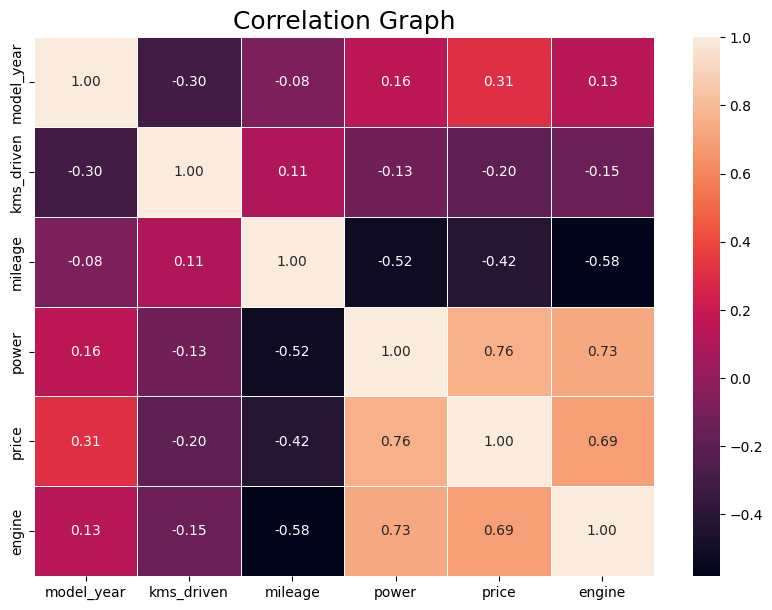

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["model_year","kms_driven","mileage","power","price","engine"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

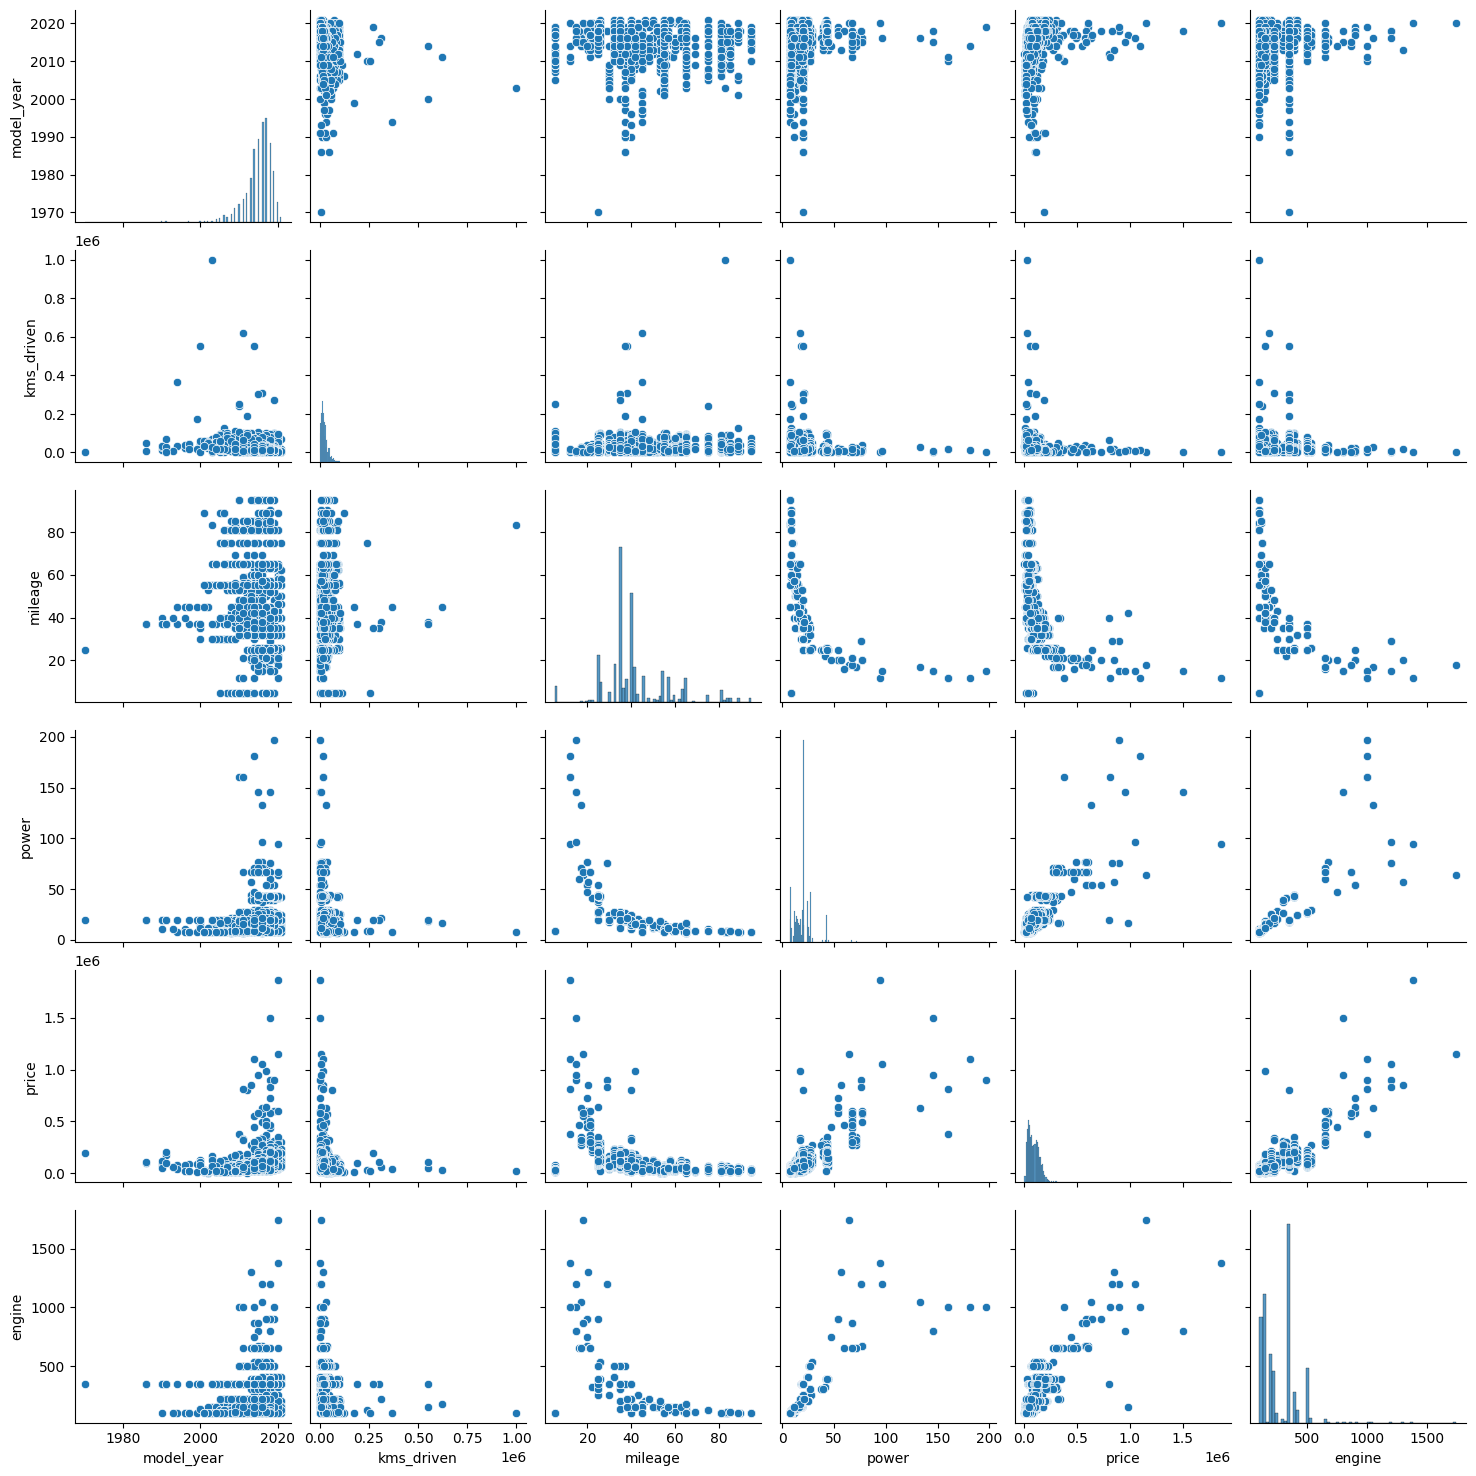

In [34]:
sns.pairplot(df)

In [35]:
X=df[['model_name','company','model_year','kms_driven','mileage','power','engine']]
y=df['price']

In [36]:
X

,model_name,company,model_year,kms_driven,mileage,power,engine
0,Royal Enfield,Royal,2016,50000.0,35.0,19.8,350.0
1,KTM Duke,KTM,2012,24561.0,35.0,25.0,200.0
2,Bajaj Pulsar,Bajaj,2016,19718.0,65.0,17.0,180.0
3,KTM Duke,KTM,2018,1350.0,25.0,42.9,390.0
4,Royal Enfield,Royal,2018,25000.0,35.0,19.8,350.0
...,...,...,...,...,...,...,...
3731,Hero Karizma,Hero,2011,66780.0,48.0,20.0,223.0
3732,Yamaha YZF-R15,Yamaha,2011,7000.0,42.0,16.0,150.0
3733,Bajaj Pulsar,Bajaj,2016,6407.0,65.0,17.0,180.0
3734,Bajaj V15,Bajaj,2016,7524.0,57.0,11.8,150.0


In [37]:
y.shape

(3736,)

In [38]:
#train ,test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [41]:
ohe=OneHotEncoder()
ohe.fit(X[['model_name','company']])

OneHotEncoder()

In [42]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['model_name','company']),
                                    remainder='passthrough')

In [43]:
#Linear Regression Model
lr=LinearRegression()

In [44]:
pipe=make_pipeline(column_trans,lr)

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Aprilia RSV4', 'Bajaj Avenger', 'Bajaj CT', 'Bajaj Discover',
       'Bajaj Platina', 'Bajaj Pulsar', 'Bajaj V12', 'Bajaj V15',
       'Benelli TNT', 'Harley-Davidson Street', 'Harley-Davidson XG750',
       'Hero CD', 'Hero Glamour', 'Hero HF', 'Hero Hunk...
       'Yamaha RX', 'Yamaha RX135', 'Yamaha SZ', 'Yamaha SZ-RR',
       'Yamaha YBR', 'Yamaha YZF-R15', 'Yamaha YZF-R1M', 'Yamaha YZF-R3'],
      dtype=object),
                                                                            array(['Aprilia', 'Bajaj', 'Benelli', 'Harley-Davidson', 'Hero', 'Honda',
       'KTM', 'Kawasaki', 'MV', 'Mahindra', 'Moto', 'Royal', 'Suzuki',
       'TVS', 'Triumph', 'Yamaha'], dtype=object)]),
                                                  ['model_name', 'company'])])),
                ('linearregression', LinearRegression())])

In [46]:
y_pred=pipe.predict(X_test)

In [47]:
r2_score(y_test,y_pred)

0.6520879715594482

In [48]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [49]:
np.argmax(scores)

579

In [50]:
scores[np.argmax(scores)]

0.802006067313026

In [51]:
import pickle


In [52]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))


In [53]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hero Passion','Hero',2019,55.0,8.0,9.0,110.0]).reshape(1,7)))

array([41756.01550371])

In [54]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Aprilia RSV4', 'Bajaj Avenger', 'Bajaj CT', 'Bajaj Discover',
       'Bajaj Platina', 'Bajaj Pulsar', 'Bajaj V12', 'Bajaj V15',
       'Benelli TNT', 'Harley-Davidson Street', 'Harley-Davidson XG750',
       'Hero CD', 'Hero Glamour', 'Hero HF', 'Hero Hunk', 'Hero Ignitor',
       'Hero Impulse', 'Hero Karizma', 'Hero New', 'Hero Passion',
       'Hero Splendor', 'Hero Splendor+', 'Hero Super', 'Hero Xpulse',
       'Hero Xtreme', 'Honda CB', 'Honda CBR', 'Honda Dream',
       'Honda VT1300CX', 'Honda X-Blade', 'KTM Duke', 'KTM RC',
       'Kawasaki ER-6n', 'Kawasaki Ninja', 'Kawasaki Vulcan', 'MV Agusta',
       'Mahindra Centuro', 'Mahindra Mojo', 'Moto Guzzi', 'Royal Enfield',
       'Royal Enfield\u200e', 'Suzuki Fiero', 'Suzuki GS', 'Suzuki GSX-R',
       'Suzuki Gixxer', 'Suzuki Hayate', 'Suzuki Inazuma',
       'Suzuki Slingshot', 'TVS Apache', 'TVS Radeon', 'TVS Sport',
       'TVS Star', 'Triumph Bonneville', 'Triumph Speed',
       'Triumph Street', 'Triumph Thruxton'